In [ ]:
# Healthcare Data Analysis - Exploratory Data Analysis
# Author: Hamdaan Peshimam
# Date: October 2025
# 
# Project Overview:
# This project performs a comprehensive exploratory data analysis on healthcare data
# containing patient information, medical conditions, billing details, and treatment outcomes.
# The goal is to uncover insights about patient demographics, healthcare costs, and treatment patterns.

# ============================================================================

# 1. IMPORT LIBRARIES

In [2]:
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")
print("="*80)

Libraries imported successfully!


# 2. LOAD AND INSPECT DATA

In [3]:
# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

print("\n📊 DATASET OVERVIEW")
print("="*80)
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Total Data Points: {df.shape[0] * df.shape[1]:,}")
print("\n" + "="*80)

# Display first few rows
print("\n🔍 First 5 Rows of the Dataset:")
print(df.head())

# Display last few rows
print("\n🔍 Last 5 Rows of the Dataset:")
print(df.tail())

# Dataset Information
print("\n📋 Dataset Information:")
print(df.info())

# Statistical Summary
print("\n📈 Statistical Summary:")
print(df.describe())

# Column Names and Data Types
print("\n📝 Column Names and Data Types:")
for col in df.columns:
    print(f"  • {col}: {df[col].dtype}")


📊 DATASET OVERVIEW
Dataset Shape: 55500 rows × 15 columns
Total Data Points: 832,500


🔍 First 5 Rows of the Dataset:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White   

# 3. DATA QUALITY ASSESSMENT

In [4]:
print("\n\n🔎 DATA QUALITY ASSESSMENT")
print("="*80)

# Check for missing values
print("\n❓ Missing Values:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate Rows: {duplicates}")
if duplicates == 0:
    print("✅ No duplicate rows found!")

# Unique values per column
print("\n🔢 Unique Values per Column:")
for col in df.columns:
    print(f"  • {col}: {df[col].nunique()} unique values")



🔎 DATA QUALITY ASSESSMENT

❓ Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
✅ No missing values found in the dataset!

🔄 Duplicate Rows: 534

🔢 Unique Values per Column:
  • Name: 49992 unique values
  • Age: 77 unique values
  • Gender: 2 unique values
  • Blood Type: 8 unique values
  • Medical Condition: 6 unique values
  • Date of Admission: 1827 unique values
  • Doctor: 40341 unique values
  • Hospital: 39876 unique values
  • Insurance Provider: 5 unique values
  • Billing Amount: 50000 unique values
  • Room Number: 400 unique values
  • Admission Type: 3 unique values
  • Discharge Date: 1856 unique values
  • Medication: 5 unique values
  • Test Results: 3 unique values


# 4. DATA PREPROCESSING


In [5]:

print("\n\n🔧 DATA PREPROCESSING")
print("="*80)

# Convert date columns to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate Length of Stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Extract date components for time-based analysis
df['Admission_Year'] = df['Date of Admission'].dt.year
df['Admission_Month'] = df['Date of Admission'].dt.month
df['Admission_Month_Name'] = df['Date of Admission'].dt.month_name()
df['Admission_Day'] = df['Date of Admission'].dt.day
df['Admission_DayOfWeek'] = df['Date of Admission'].dt.day_name()

print("✅ Date columns converted to datetime format")
print("✅ Length of Stay calculated")
print("✅ Temporal features extracted")
print(f"\nNew dataset shape: {df.shape}")



🔧 DATA PREPROCESSING
✅ Date columns converted to datetime format
✅ Length of Stay calculated
✅ Temporal features extracted

New dataset shape: (55500, 21)


# 5. UNIVARIATE ANALYSIS



📊 UNIVARIATE ANALYSIS


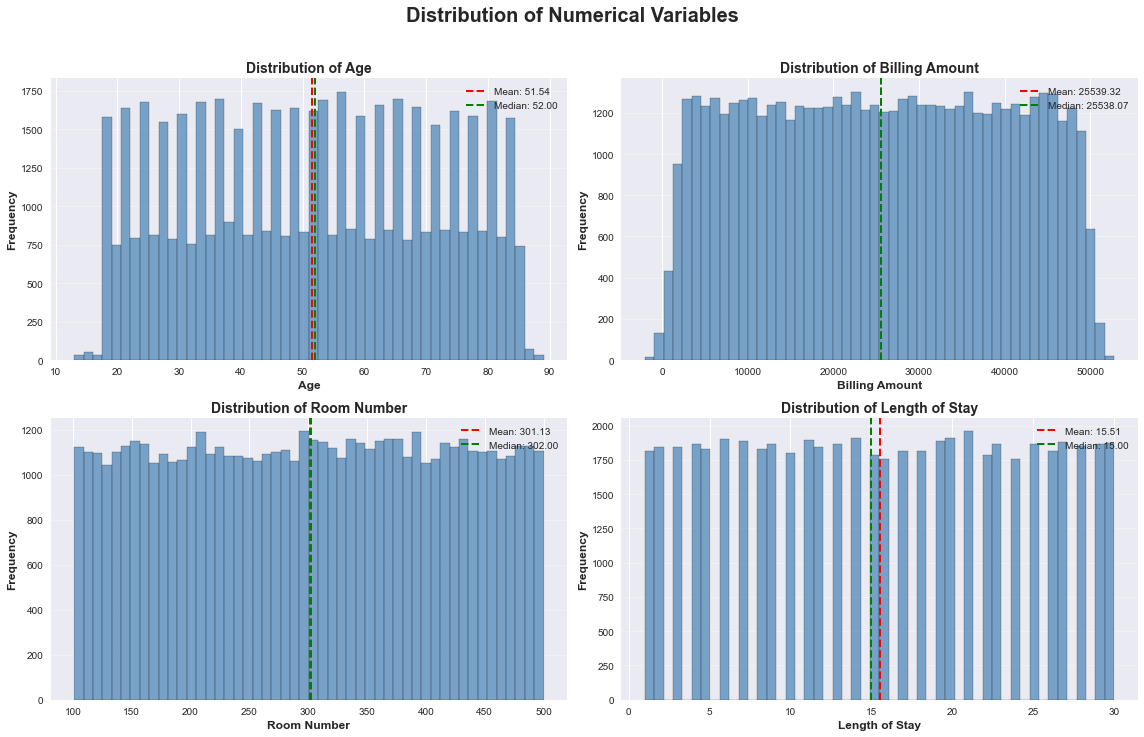


📊 Numerical Variables Statistics:
            Age  Billing Amount  Room Number  Length of Stay
count  55500.00        55500.00     55500.00        55500.00
mean      51.54        25539.32       301.13           15.51
std       19.60        14211.45       115.24            8.66
min       13.00        -2008.49       101.00            1.00
25%       35.00        13241.22       202.00            8.00
50%       52.00        25538.07       302.00           15.00
75%       68.00        37820.51       401.00           23.00
max       89.00        52764.28       500.00           30.00


In [6]:
print("\n\n📊 UNIVARIATE ANALYSIS")
print("="*80)

# Numerical Variables Distribution
numerical_cols = ['Age', 'Billing Amount', 'Room Number', 'Length of Stay']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=20, fontweight='bold', y=1.02)

for idx, col in enumerate(numerical_cols):
    row = idx // 2
    col_idx = idx % 2
    ax = axes[row, col_idx]
    
    # Histogram with KDE
    ax.hist(df[col], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_xlabel(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend()

plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Numerical Variables Statistics:")
print(df[numerical_cols].describe().round(2))

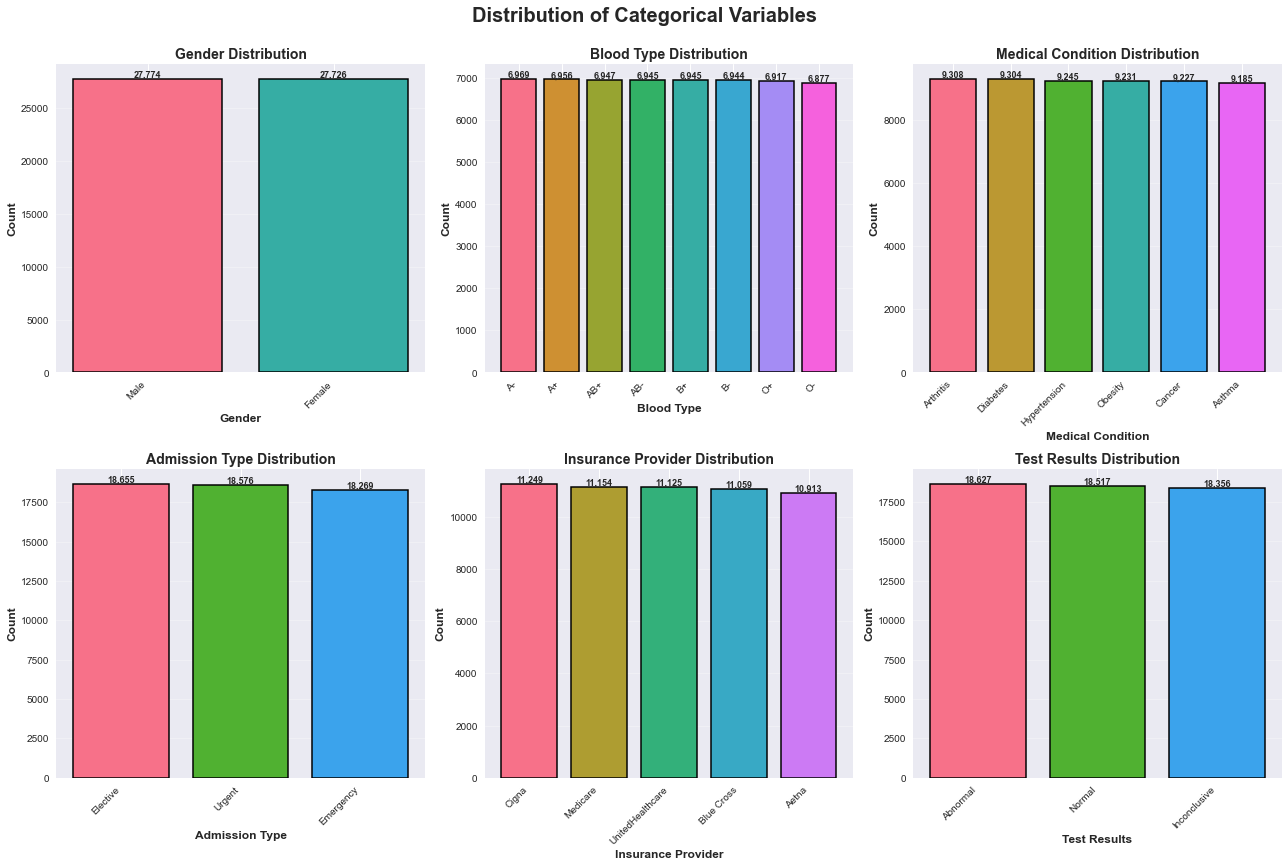


📊 Categorical Variables Distribution:

Gender:
Male      27774
Female    27726
Name: Gender, dtype: int64
Percentage:
Male      50.04
Female    49.96
Name: Gender, dtype: float64

Blood Type:
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: Blood Type, dtype: int64
Percentage:
A-     12.56
A+     12.53
AB+    12.52
AB-    12.51
B+     12.51
B-     12.51
O+     12.46
O-     12.39
Name: Blood Type, dtype: float64

Medical Condition:
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: Medical Condition, dtype: int64
Percentage:
Arthritis       16.77
Diabetes        16.76
Hypertension    16.66
Obesity         16.63
Cancer          16.63
Asthma          16.55
Name: Medical Condition, dtype: float64

Admission Type:
Elective     18655
Urgent       18576
Emergency    18269
Name: Admission Type, dtype: int64
Percentage:
Elective     33.61
Urgent       33.47
Emer

In [7]:
# Categorical Variables
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 
                   'Insurance Provider', 'Test Results']

# Gender Distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Categorical Variables', fontsize=20, fontweight='bold', y=1.00)

for idx, col in enumerate(categorical_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    value_counts = df[col].value_counts()
    
    # Bar plot
    bars = ax.bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette("husl", len(value_counts)), 
                  edgecolor='black', linewidth=1.5)
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    ax.set_xlabel(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Categorical Variables Distribution:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Percentage:\n{df[col].value_counts(normalize=True).mul(100).round(2)}")

# 6. BIVARIATE ANALYSIS




🔗 BIVARIATE ANALYSIS


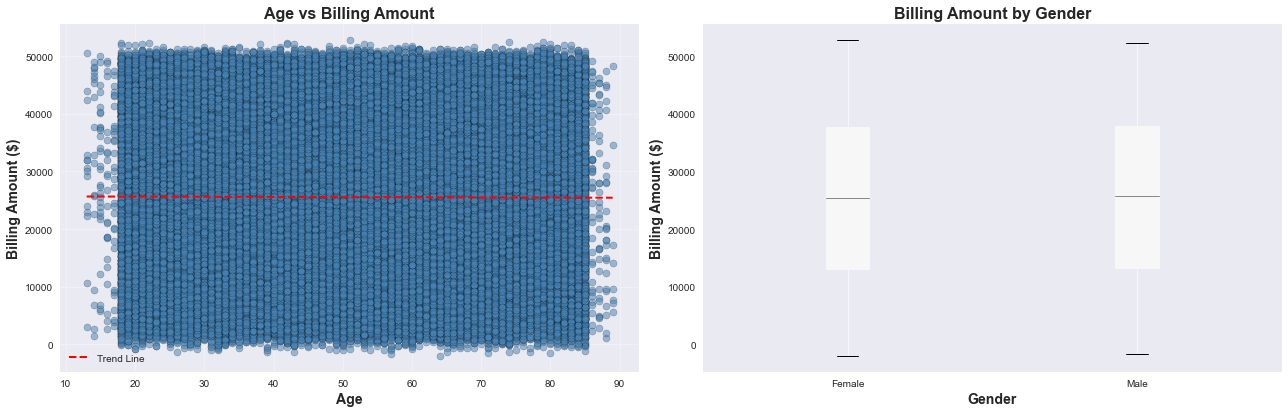

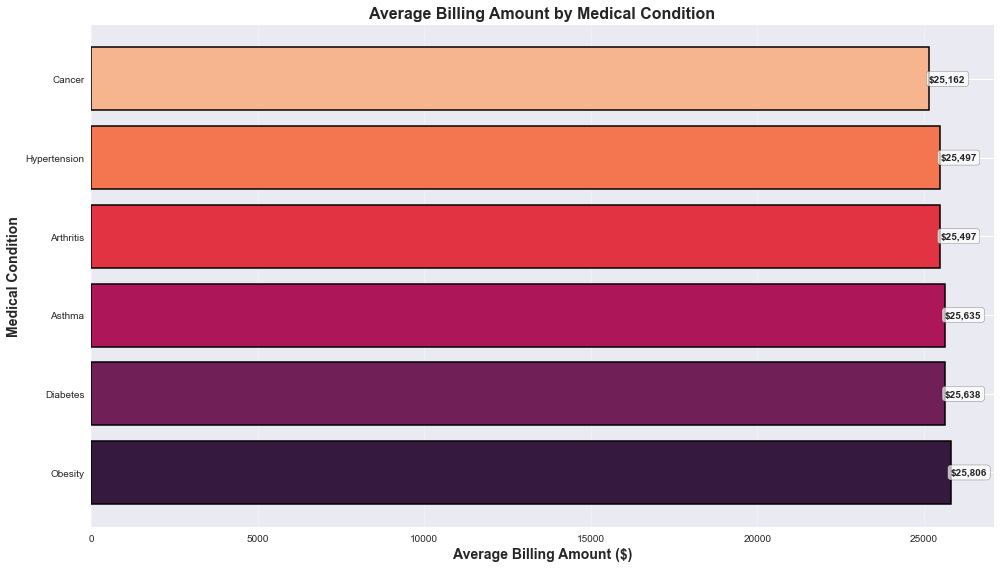

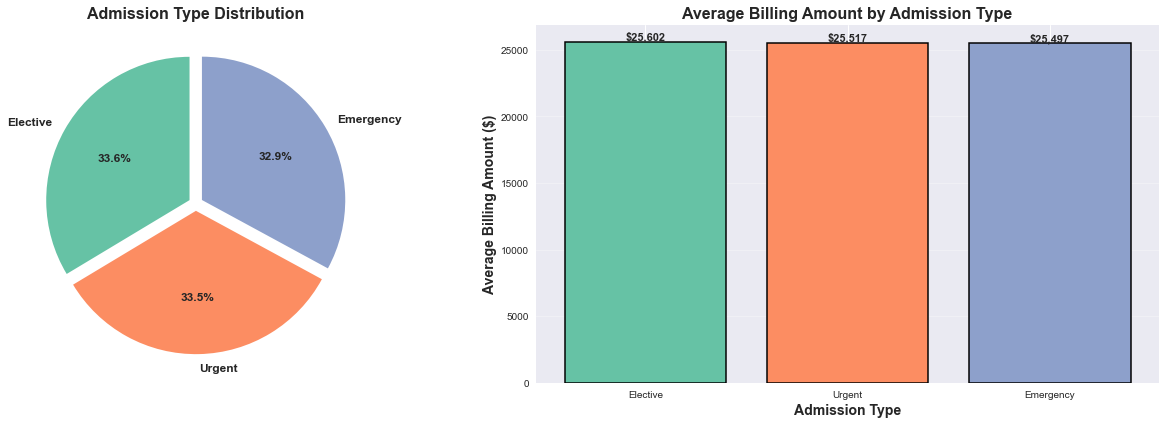

In [8]:
print("\n\n🔗 BIVARIATE ANALYSIS")
print("="*80)

# Age vs Billing Amount
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot
axes[0].scatter(df['Age'], df['Billing Amount'], alpha=0.5, c='steelblue', edgecolor='black', s=50)
axes[0].set_xlabel('Age', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Billing Amount ($)', fontsize=14, fontweight='bold')
axes[0].set_title('Age vs Billing Amount', fontsize=16, fontweight='bold')
axes[0].grid(alpha=0.3)

# Add trend line
z = np.polyfit(df['Age'], df['Billing Amount'], 1)
p = np.poly1d(z)
axes[0].plot(df['Age'].sort_values(), p(df['Age'].sort_values()), 
             "r--", linewidth=2, label='Trend Line')
axes[0].legend()

# Box plot: Gender vs Billing Amount
df.boxplot(column='Billing Amount', by='Gender', ax=axes[1], 
           patch_artist=True, grid=False)
axes[1].set_xlabel('Gender', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Billing Amount ($)', fontsize=14, fontweight='bold')
axes[1].set_title('Billing Amount by Gender', fontsize=16, fontweight='bold')
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.savefig('age_billing_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Medical Condition vs Billing Amount
fig, ax = plt.subplots(figsize=(14, 8))
medical_billing = df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)
bars = ax.barh(medical_billing.index, medical_billing.values, 
               color=sns.color_palette("rocket", len(medical_billing)), 
               edgecolor='black', linewidth=1.5)
ax.set_xlabel('Average Billing Amount ($)', fontsize=14, fontweight='bold')
ax.set_ylabel('Medical Condition', fontsize=14, fontweight='bold')
ax.set_title('Average Billing Amount by Medical Condition', fontsize=16, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2., 
            f'${width:,.0f}',
            ha='left', va='center', fontsize=10, fontweight='bold', 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.savefig('medical_condition_billing.png', dpi=300, bbox_inches='tight')
plt.show()

# Admission Type Analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Count by Admission Type
admission_counts = df['Admission Type'].value_counts()
colors = sns.color_palette("Set2", len(admission_counts))
wedges, texts, autotexts = axes[0].pie(admission_counts.values, labels=admission_counts.index, 
                                         autopct='%1.1f%%', startangle=90, colors=colors,
                                         explode=[0.05]*len(admission_counts),
                                         textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Admission Type Distribution', fontsize=16, fontweight='bold')

# Billing by Admission Type
admission_billing = df.groupby('Admission Type')['Billing Amount'].mean().sort_values(ascending=False)
bars = axes[1].bar(admission_billing.index, admission_billing.values,
                   color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Admission Type', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Billing Amount ($)', fontsize=14, fontweight='bold')
axes[1].set_title('Average Billing Amount by Admission Type', fontsize=16, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('admission_type_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. CORRELATION ANALYSIS




🔗 CORRELATION ANALYSIS

Correlation Matrix:
                  Age  Billing Amount  Room Number  Length of Stay
Age             1.000          -0.004       -0.001           0.008
Billing Amount -0.004           1.000       -0.003          -0.006
Room Number    -0.001          -0.003        1.000          -0.006
Length of Stay  0.008          -0.006       -0.006           1.000


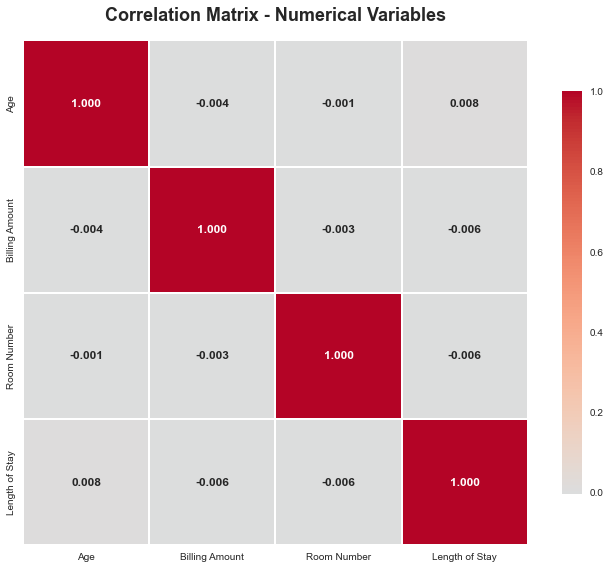

In [9]:
print("\n\n🔗 CORRELATION ANALYSIS")
print("="*80)

# Select numerical columns for correlation
corr_cols = ['Age', 'Billing Amount', 'Room Number', 'Length of Stay']
correlation_matrix = df[corr_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

# Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.3f', annot_kws={'fontsize': 12, 'fontweight': 'bold'})
ax.set_title('Correlation Matrix - Numerical Variables', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. TEMPORAL ANALYSIS



📅 TEMPORAL ANALYSIS


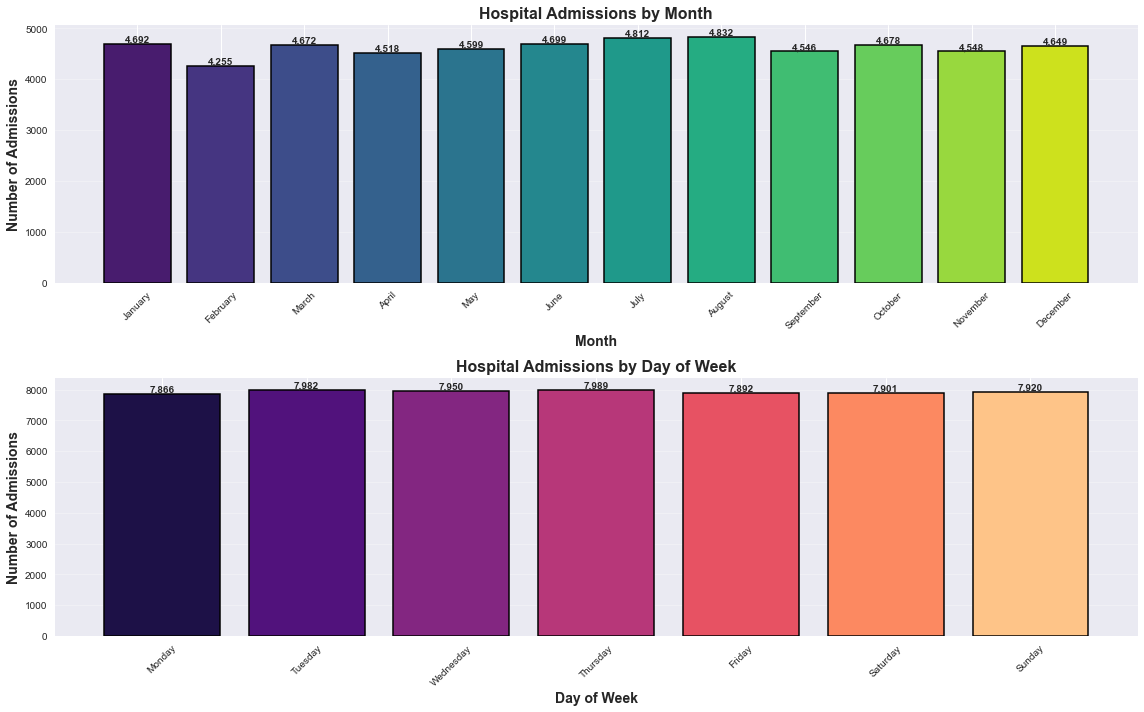

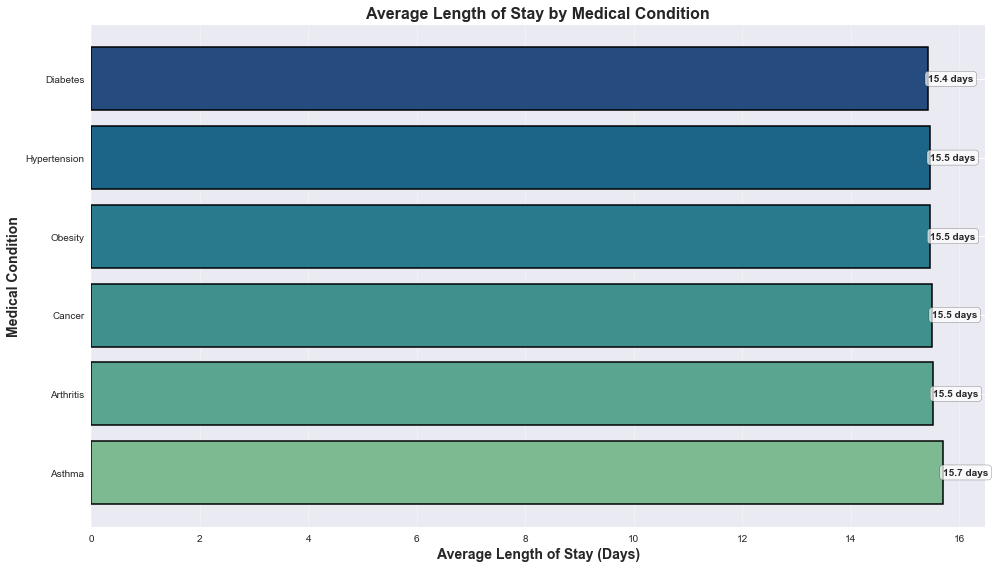


📊 Length of Stay Statistics:
count    55500.00
mean        15.51
std          8.66
min          1.00
25%          8.00
50%         15.00
75%         23.00
max         30.00
Name: Length of Stay, dtype: float64


In [10]:
print("\n\n📅 TEMPORAL ANALYSIS")
print("="*80)

# Admissions over time
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# By Month
monthly_admissions = df.groupby('Admission_Month_Name').size().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December']
)
bars = axes[0].bar(monthly_admissions.index, monthly_admissions.values, 
                   color=sns.color_palette("viridis", 12), 
                   edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Month', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Admissions', fontsize=14, fontweight='bold')
axes[0].set_title('Hospital Admissions by Month', fontsize=16, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# By Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_admissions = df.groupby('Admission_DayOfWeek').size().reindex(day_order)
bars = axes[1].bar(daily_admissions.index, daily_admissions.values, 
                   color=sns.color_palette("magma", 7), 
                   edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Day of Week', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Admissions', fontsize=14, fontweight='bold')
axes[1].set_title('Hospital Admissions by Day of Week', fontsize=16, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Length of Stay Analysis
fig, ax = plt.subplots(figsize=(14, 8))
los_by_condition = df.groupby('Medical Condition')['Length of Stay'].mean().sort_values(ascending=False)
bars = ax.barh(los_by_condition.index, los_by_condition.values,
               color=sns.color_palette("crest", len(los_by_condition)),
               edgecolor='black', linewidth=1.5)
ax.set_xlabel('Average Length of Stay (Days)', fontsize=14, fontweight='bold')
ax.set_ylabel('Medical Condition', fontsize=14, fontweight='bold')
ax.set_title('Average Length of Stay by Medical Condition', fontsize=16, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2., 
            f'{width:.1f} days',
            ha='left', va='center', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.savefig('length_of_stay_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Length of Stay Statistics:")
print(df['Length of Stay'].describe().round(2))


# 9. ADVANCED INSIGHTS



💡 ADVANCED INSIGHTS


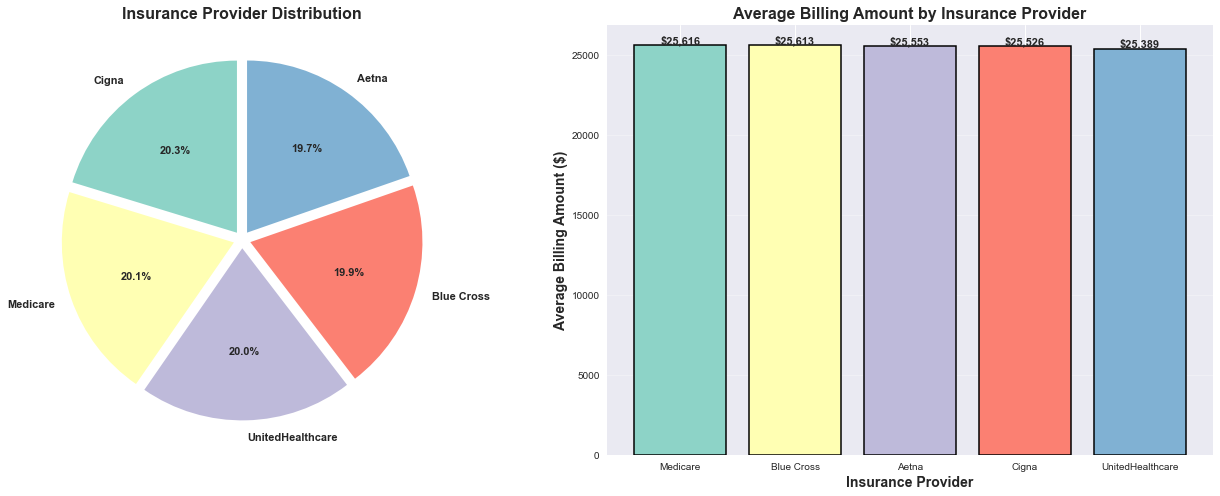

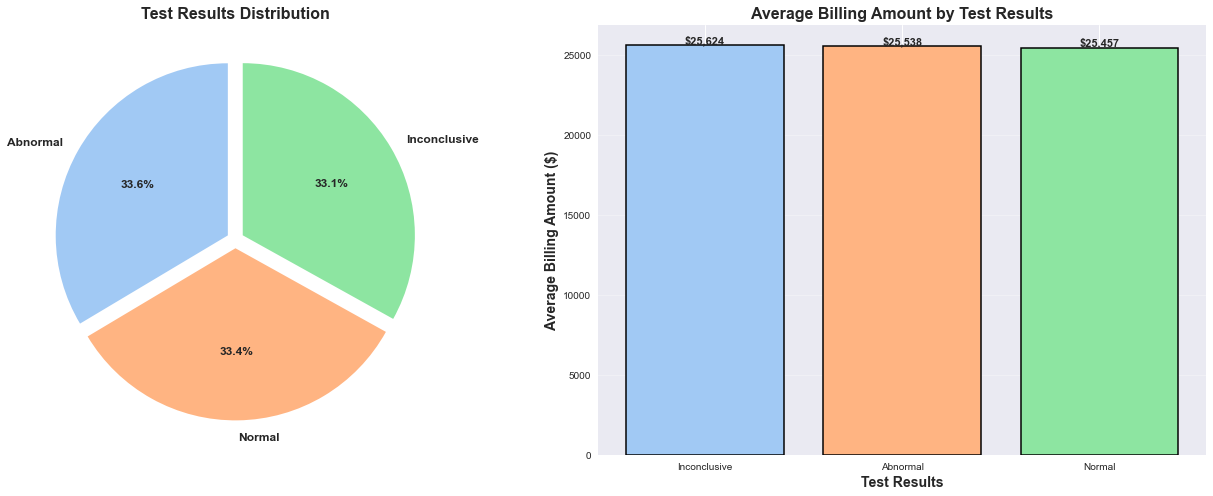

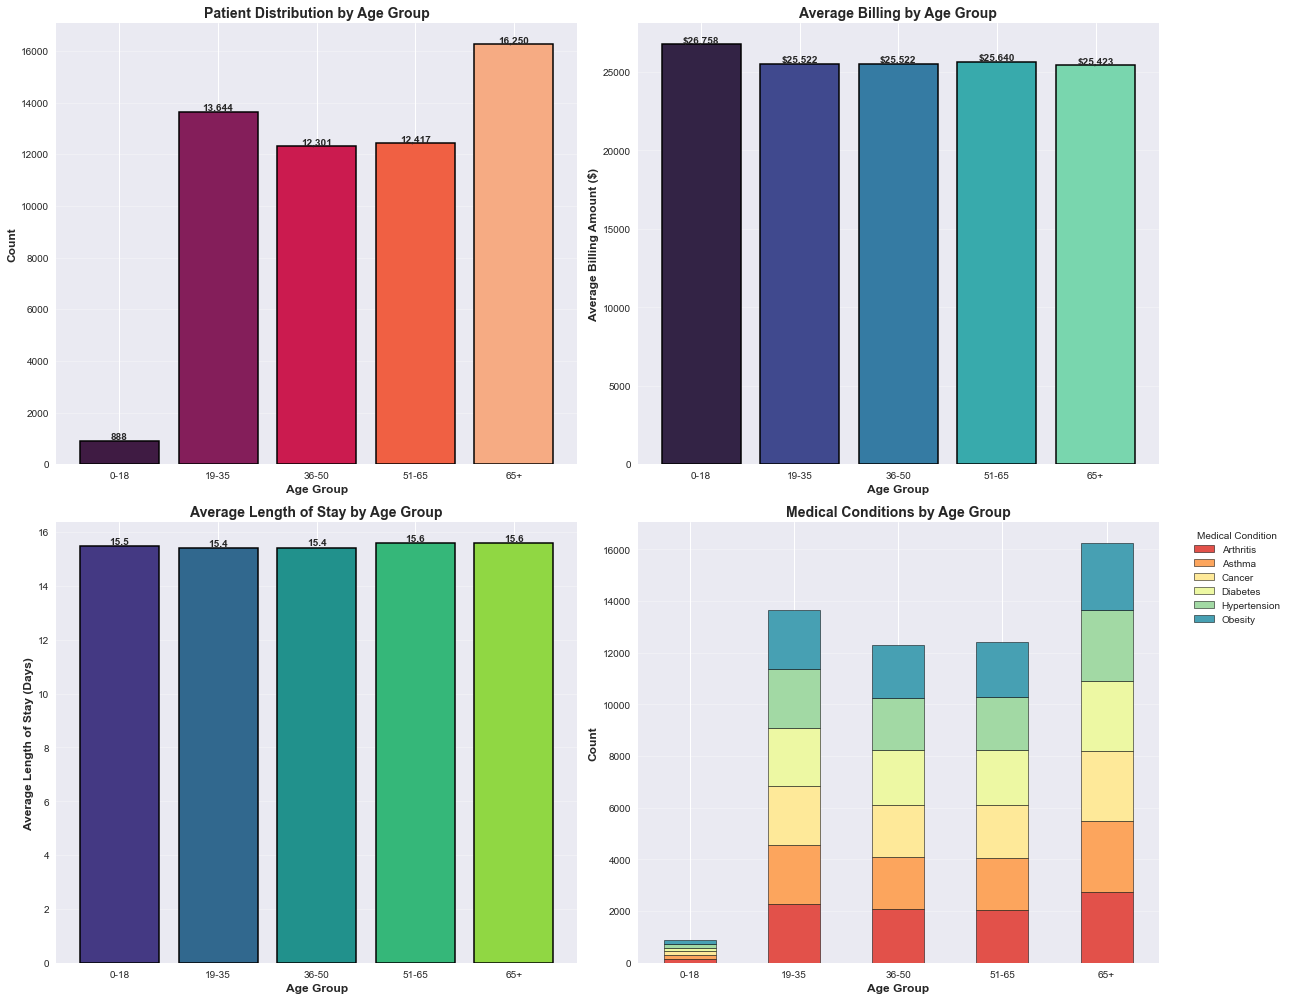

In [11]:
print("\n\n💡 ADVANCED INSIGHTS")
print("="*80)

# Insurance Provider Analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

insurance_counts = df['Insurance Provider'].value_counts()
colors = sns.color_palette("Set3", len(insurance_counts))
axes[0].pie(insurance_counts.values, labels=insurance_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=[0.05]*len(insurance_counts),
            textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0].set_title('Insurance Provider Distribution', fontsize=16, fontweight='bold')

insurance_billing = df.groupby('Insurance Provider')['Billing Amount'].mean().sort_values(ascending=False)
bars = axes[1].bar(insurance_billing.index, insurance_billing.values,
                   color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Insurance Provider', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Billing Amount ($)', fontsize=14, fontweight='bold')
axes[1].set_title('Average Billing Amount by Insurance Provider', fontsize=16, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('insurance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Test Results Analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

test_counts = df['Test Results'].value_counts()
colors = sns.color_palette("pastel", len(test_counts))
wedges, texts, autotexts = axes[0].pie(test_counts.values, labels=test_counts.index, 
                                         autopct='%1.1f%%', startangle=90, colors=colors,
                                         explode=[0.05]*len(test_counts),
                                         textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Test Results Distribution', fontsize=16, fontweight='bold')

test_billing = df.groupby('Test Results')['Billing Amount'].mean().sort_values(ascending=False)
bars = axes[1].bar(test_billing.index, test_billing.values,
                   color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Test Results', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Billing Amount ($)', fontsize=14, fontweight='bold')
axes[1].set_title('Average Billing Amount by Test Results', fontsize=16, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('test_results_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Age Group Analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], 
                         labels=['0-18', '19-35', '36-50', '51-65', '65+'])

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Age Group Distribution
age_group_counts = df['Age_Group'].value_counts().sort_index()
bars = axes[0, 0].bar(age_group_counts.index, age_group_counts.values,
                      color=sns.color_palette("rocket", len(age_group_counts)),
                      edgecolor='black', linewidth=1.5)
axes[0, 0].set_xlabel('Age Group', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Patient Distribution by Age Group', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Age Group vs Billing
age_group_billing = df.groupby('Age_Group')['Billing Amount'].mean().sort_index()
bars = axes[0, 1].bar(age_group_billing.index, age_group_billing.values,
                      color=sns.color_palette("mako", len(age_group_billing)),
                      edgecolor='black', linewidth=1.5)
axes[0, 1].set_xlabel('Age Group', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Billing Amount ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Average Billing by Age Group', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Age Group vs Length of Stay
age_group_los = df.groupby('Age_Group')['Length of Stay'].mean().sort_index()
bars = axes[1, 0].bar(age_group_los.index, age_group_los.values,
                      color=sns.color_palette("viridis", len(age_group_los)),
                      edgecolor='black', linewidth=1.5)
axes[1, 0].set_xlabel('Age Group', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Length of Stay (Days)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Average Length of Stay by Age Group', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Medical Condition by Age Group
condition_age = pd.crosstab(df['Age_Group'], df['Medical Condition'])
condition_age.plot(kind='bar', stacked=True, ax=axes[1, 1], 
                   color=sns.color_palette("Spectral", len(condition_age.columns)),
                   edgecolor='black', linewidth=0.5)
axes[1, 1].set_xlabel('Age Group', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Medical Conditions by Age Group', fontsize=14, fontweight='bold')
axes[1, 1].legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('age_group_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


# 10. KEY FINDINGS & SUMMARY


In [12]:
print("\n\n📋 KEY FINDINGS & SUMMARY")
print("="*80)

print("\n🔹 Dataset Overview:")
print(f"   • Total Patients: {len(df):,}")
print(f"   • Data Collection Period: {df['Date of Admission'].min().date()} to {df['Date of Admission'].max().date()}")
print(f"   • Total Hospitals: {df['Hospital'].nunique()}")
print(f"   • Total Doctors: {df['Doctor'].nunique()}")

print("\n🔹 Patient Demographics:")
print(f"   • Average Age: {df['Age'].mean():.1f} years")
print(f"   • Age Range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"   • Gender Distribution: {df['Gender'].value_counts().to_dict()}")
print(f"   • Most Common Blood Type: {df['Blood Type'].mode()[0]}")

print("\n🔹 Financial Insights:")
print(f"   • Average Billing Amount: ${df['Billing Amount'].mean():,.2f}")
print(f"   • Median Billing Amount: ${df['Billing Amount'].median():,.2f}")
print(f"   • Total Revenue: ${df['Billing Amount'].sum():,.2f}")
print(f"   • Billing Range: ${df['Billing Amount'].min():,.2f} - ${df['Billing Amount'].max():,.2f}")

print("\n🔹 Medical Conditions:")
print(f"   • Total Medical Conditions: {df['Medical Condition'].nunique()}")
print(f"   • Most Common Condition: {df['Medical Condition'].mode()[0]} ({df['Medical Condition'].value_counts().iloc[0]:,} cases)")
medical_condition_top3 = df['Medical Condition'].value_counts().head(3)
print(f"   • Top 3 Conditions:")
for condition, count in medical_condition_top3.items():
    print(f"     - {condition}: {count:,} cases ({count/len(df)*100:.1f}%)")

print("\n🔹 Hospital Stay Metrics:")
print(f"   • Average Length of Stay: {df['Length of Stay'].mean():.1f} days")
print(f"   • Median Length of Stay: {df['Length of Stay'].median():.1f} days")
print(f"   • Longest Stay: {df['Length of Stay'].max()} days")
print(f"   • Shortest Stay: {df['Length of Stay'].min()} days")

print("\n🔹 Admission Patterns:")
admission_type_dist = df['Admission Type'].value_counts()
print(f"   • Admission Type Distribution:")
for adm_type, count in admission_type_dist.items():
    print(f"     - {adm_type}: {count:,} ({count/len(df)*100:.1f}%)")
busiest_month = monthly_admissions.idxmax()
print(f"   • Busiest Month: {busiest_month} ({monthly_admissions.max():,} admissions)")
busiest_day = daily_admissions.idxmax()
print(f"   • Busiest Day: {busiest_day} ({daily_admissions.max():,} admissions)")

print("\n🔹 Insurance Coverage:")
insurance_dist = df['Insurance Provider'].value_counts()
print(f"   • Insurance Providers: {df['Insurance Provider'].nunique()}")
for provider, count in insurance_dist.items():
    print(f"     - {provider}: {count:,} patients ({count/len(df)*100:.1f}%)")

print("\n🔹 Test Results Distribution:")
test_results_dist = df['Test Results'].value_counts()
for result, count in test_results_dist.items():
    print(f"   • {result}: {count:,} ({count/len(df)*100:.1f}%)")

print("\n🔹 Cost Analysis by Medical Condition:")
top_expensive_conditions = df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False).head(3)
print(f"   • Most Expensive Conditions (Average):")
for condition, avg_cost in top_expensive_conditions.items():
    print(f"     - {condition}: ${avg_cost:,.2f}")



📋 KEY FINDINGS & SUMMARY

🔹 Dataset Overview:
   • Total Patients: 55,500
   • Data Collection Period: 2019-05-08 to 2024-05-07
   • Total Hospitals: 39876
   • Total Doctors: 40341

🔹 Patient Demographics:
   • Average Age: 51.5 years
   • Age Range: 13 - 89 years
   • Gender Distribution: {'Male': 27774, 'Female': 27726}
   • Most Common Blood Type: A-

🔹 Financial Insights:
   • Average Billing Amount: $25,539.32
   • Median Billing Amount: $25,538.07
   • Total Revenue: $1,417,432,043.40
   • Billing Range: $-2,008.49 - $52,764.28

🔹 Medical Conditions:
   • Total Medical Conditions: 6
   • Most Common Condition: Arthritis (9,308 cases)
   • Top 3 Conditions:
     - Arthritis: 9,308 cases (16.8%)
     - Diabetes: 9,304 cases (16.8%)
     - Hypertension: 9,245 cases (16.7%)

🔹 Hospital Stay Metrics:
   • Average Length of Stay: 15.5 days
   • Median Length of Stay: 15.0 days
   • Longest Stay: 30 days
   • Shortest Stay: 1 days

🔹 Admission Patterns:
   • Admission Type Distributi